# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\w7161834\Downloads\Insurance_Claims_Cleaned_Final_Ayesha_Paruk.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Missing Values

In [4]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
df_new = df.drop("_c39", axis = 1)

KeyError: "['_c39'] not found in axis"

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1257.02011,1.101000e+06,501214.488000,25169.848000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52776.783000,7435.079000,7398.335000,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,610.669237,243.90920,2.297407e+06,71701.610941,27850.122994,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.856775,4880.715471,4824.643275,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.33000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.56750,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1258.41500,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.69500,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.59000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


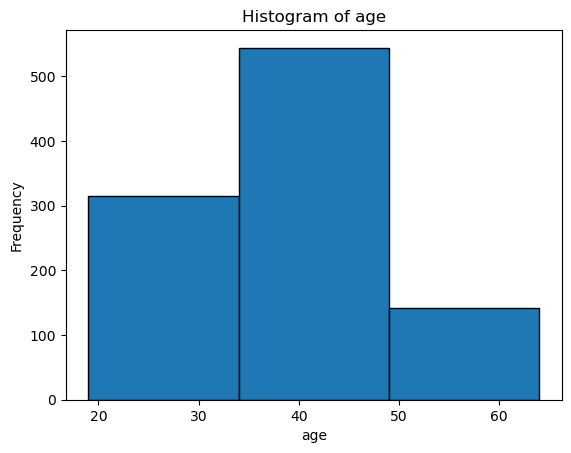

In [8]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [9]:
bin_edges = [0, 30, 55, 100]  
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  

df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [10]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [12]:
bin_edges_customer = [0, 25, 150, 500] 
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  


df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [14]:
df["Contract Years"] = df["months_as_customer"]/12

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [16]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [17]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [18]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [33]:
df.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

In [20]:
import pandas as pd

bins = [18, 30, 40, 50, 60, 70, 120] 
labels = ['15-30', '31-40', '41-50', '51-60', '61-70', '71+']  

df['age_bucket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df[['age', 'age_bucket']])

     age age_bucket
0     48      41-50
1     42      41-50
2     29      15-30
3     41      41-50
4     44      41-50
..   ...        ...
995   38      31-40
996   41      41-50
997   34      31-40
998   62      61-70
999   60      61-70

[1000 rows x 2 columns]


In [21]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_bucket
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,41-50
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,41-50
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,15-30
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,41-50
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,41-50


In [22]:
df['years_as_customer'] = df['months_as_customer'] / 12

print(df[['months_as_customer', 'years_as_customer']])

     months_as_customer  years_as_customer
0                   328          27.333333
1                   228          19.000000
2                   134          11.166667
3                   256          21.333333
4                   228          19.000000
..                  ...                ...
995                   3           0.250000
996                 285          23.750000
997                 130          10.833333
998                 458          38.166667
999                 456          38.000000

[1000 rows x 2 columns]


In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_bucket,years_as_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,41-50,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,41-50,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,15-30,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,41-50,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,41-50,19.000000


In [24]:
import pandas as pd

bins = [0, 1999, 2005, 2010, 2015, 9999]  
labels = ['Before 1999', '1999-2005', '2006-2010', '2011-2015', 'After 2015']

df['auto_year_bins'] = pd.cut(df['auto_year'], bins=bins, labels=labels, right=False)

print(df[['auto_year', 'auto_year_bins']])

     auto_year auto_year_bins
0         2004      1999-2005
1         2007      2006-2010
2         2007      2006-2010
3         2014      2011-2015
4         2009      2006-2010
..         ...            ...
995       2006      2006-2010
996       2015     After 2015
997       1996    Before 1999
998       1998    Before 1999
999       2007      2006-2010

[1000 rows x 2 columns]


In [25]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_bucket,years_as_customer,auto_year_bins
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,41-50,27.333333,1999-2005
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,41-50,19.000000,2006-2010
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,15-30,11.166667,2006-2010
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,41-50,21.333333,2011-2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,41-50,19.000000,2006-2010


In [26]:
pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


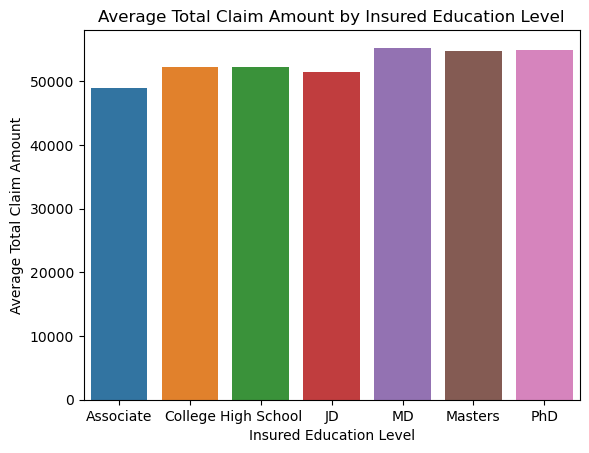

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


average_claims = df.groupby('insured_education_level')['total_claim_amount'].mean().reset_index()


sns.barplot(x='insured_education_level', y='total_claim_amount', data=average_claims)
plt.title('Average Total Claim Amount by Insured Education Level')
plt.xlabel('Insured Education Level')
plt.ylabel('Average Total Claim Amount')
plt.show()

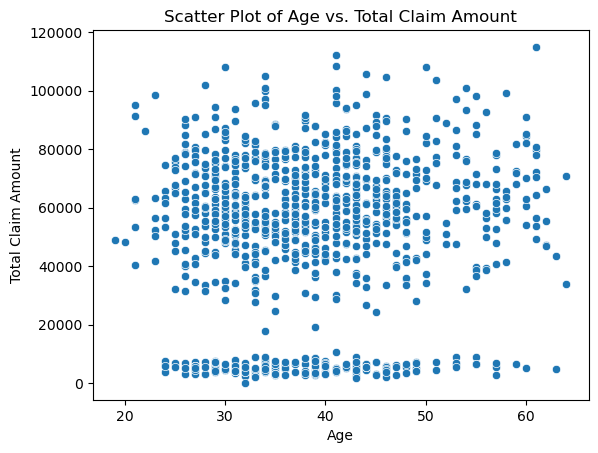

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='total_claim_amount', data=df)
plt.title('Scatter Plot of Age vs. Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

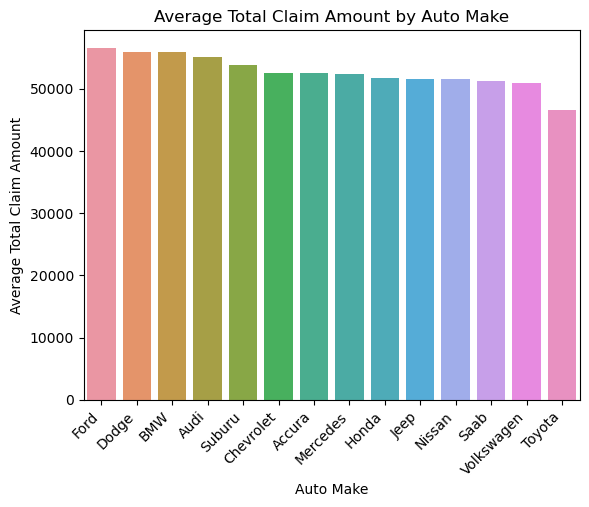

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

average_claims = df.groupby('auto_make')['total_claim_amount'].mean().reset_index()


average_claims = average_claims.sort_values(by='total_claim_amount', ascending=False)


sns.barplot(x='auto_make', y='total_claim_amount', data=average_claims)
plt.title('Average Total Claim Amount by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Average Total Claim Amount')
plt.xticks(rotation=45, ha='right')  
plt.show()

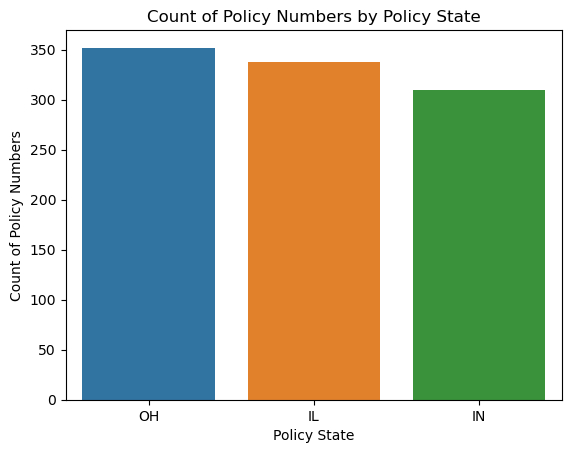

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


policy_count = df['policy_state'].value_counts().reset_index()


policy_count.columns = ['policy_state', 'count']


sns.barplot(x='policy_state', y='count', data=policy_count)
plt.title('Count of Policy Numbers by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Count of Policy Numbers')
plt.show()

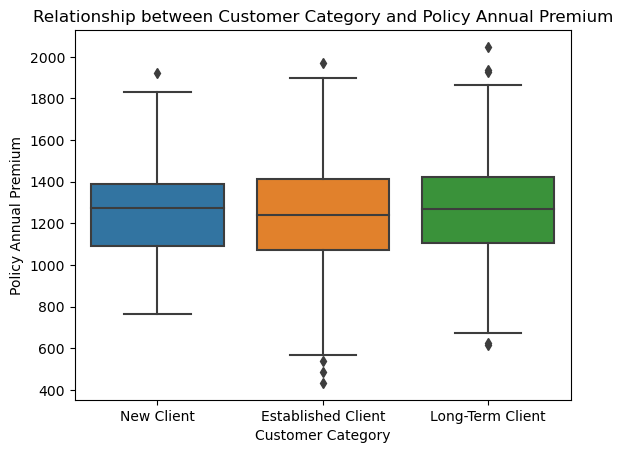

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='customer_category', y='policy_annual_premium', data=df)
plt.title('Relationship between Customer Category and Policy Annual Premium')
plt.xlabel('Customer Category')
plt.ylabel('Policy Annual Premium')
plt.show()

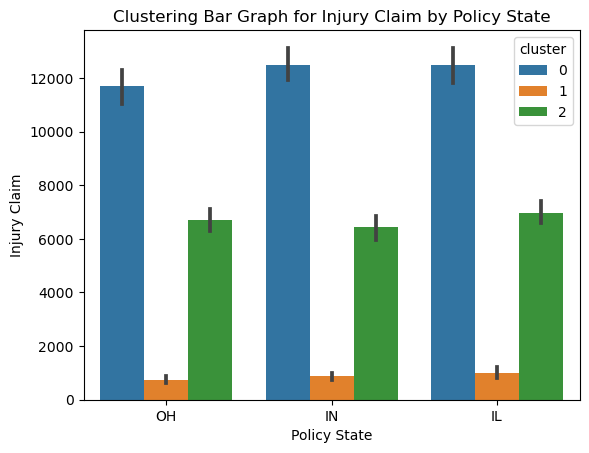

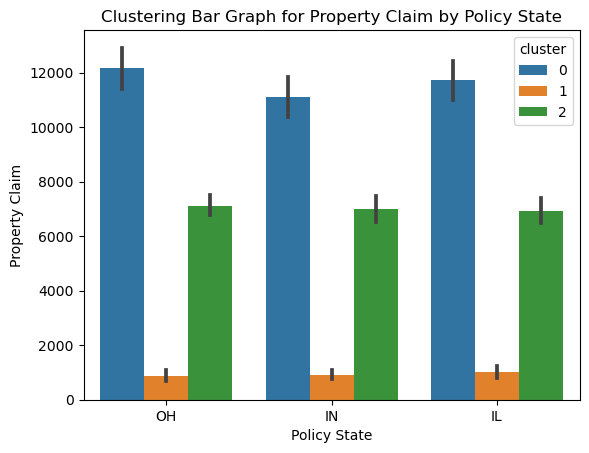

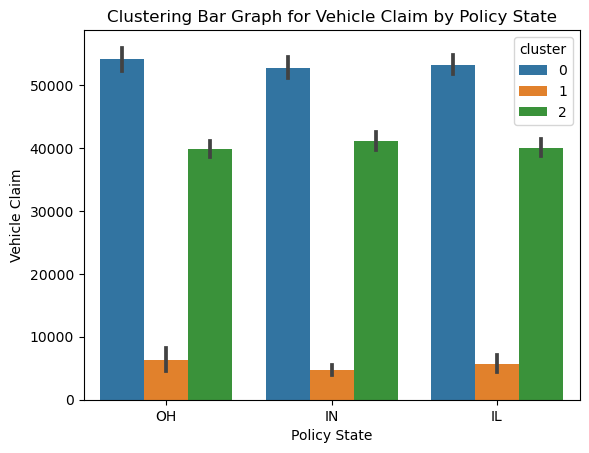

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

selected_columns = ['injury_claim', 'property_claim', 'vehicle_claim']


subset_df = df[selected_columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


sns.barplot(x='policy_state', y='injury_claim', hue='cluster', data=df)
plt.title('Clustering Bar Graph for Injury Claim by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Injury Claim')
plt.show()

sns.barplot(x='policy_state', y='property_claim', hue='cluster', data=df)
plt.title('Clustering Bar Graph for Property Claim by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Property Claim')
plt.show()

sns.barplot(x='policy_state', y='vehicle_claim', hue='cluster', data=df)
plt.title('Clustering Bar Graph for Vehicle Claim by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Vehicle Claim')
plt.show()